# SVM 
## Classification SVM linéaire



In [1]:
import numpy as np
import os
import warnings


# graine de nombre aléatoire
np.random.seed(42)

# pour le tracé de jolies figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



# dossier de sauvegarde des figures
PROJECT_ROOT_DIR = "/Users/jmb/Desktop/INSA 5A INITIATION IA/IMAGES"
CHAPTER_ID = ""

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

* https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
* https://fr.wikipedia.org/wiki/Iris_de_Fisher
* https://scikit-learn.org/stable/datasets/index.html

In [2]:
from sklearn.datasets import load_iris

# on importe le dataset iris 
# dans X on ne considère que longueur et largeur du sepal

iris = load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]


In [3]:
import pprint as pp
#pour avoir la description de notre jeu de données en bien adapté aux écran

pp.pprint(iris.DESCR)

('.. _iris_dataset:\n'
 '\n'
 'Iris plants dataset\n'
 '--------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 '    :Number of Instances: 150 (50 in each of three classes)\n'
 '    :Number of Attributes: 4 numeric, predictive attributes and the class\n'
 '    :Attribute Information:\n'
 '        - sepal length in cm\n'
 '        - sepal width in cm\n'
 '        - petal length in cm\n'
 '        - petal width in cm\n'
 '        - class:\n'
 '                - Iris-Setosa\n'
 '                - Iris-Versicolour\n'
 '                - Iris-Virginica\n'
 '                \n'
 '    :Summary Statistics:\n'
 '\n'
 '    ============== ==== ==== ======= ===== ====================\n'
 '                    Min  Max   Mean    SD   Class Correlation\n'
 '    ============== ==== ==== ======= ===== ====================\n'
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826\n'
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n'
 '    petal length:   1.0  6.9   3.76   1.76    

https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm

In [4]:
#import de la bibliothèque SVM
from sklearn.svm import SVC

#on distingue les deux classes (setosa ou versicolor) pour faire de la classification binaire
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


In [5]:
X[0:10],y[0:10]

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [6]:
iris.data[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
#on entraine le modèle
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

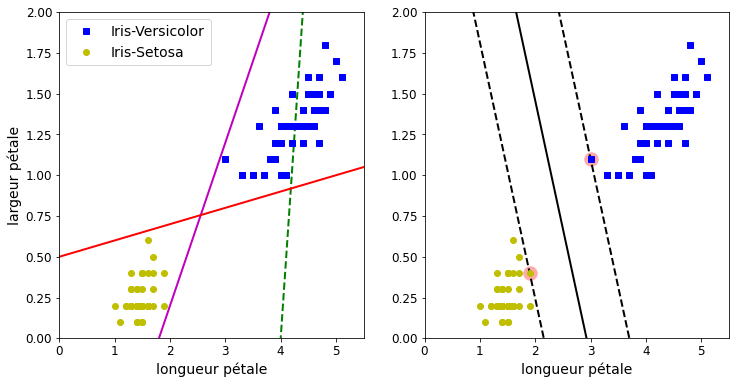

In [8]:
# Mauvais modèle
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Frontière de décision, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("longueur pétale", fontsize=14)
plt.ylabel("largeur pétale", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("longueur pétale", fontsize=14)
plt.axis([0, 5.5, 0, 2])
#save_fig("large_margin_classification_plot")
plt.show()

## problème : sensible aux données aberrantes dites outlier

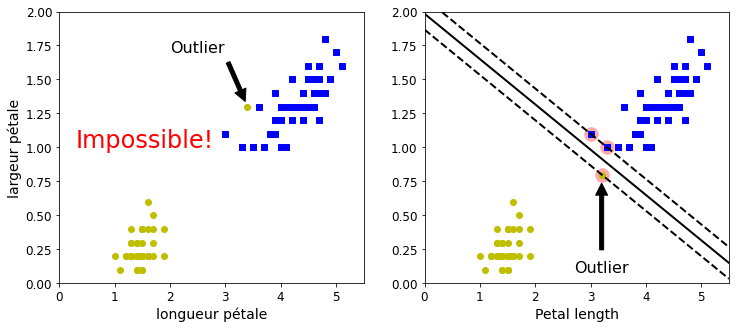

In [9]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("longueur pétale", fontsize=14)
plt.ylabel("largeur pétale", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
#save_fig("sensitivity_to_feature_scales_plot")
plt.show()

## Classification à marge souple

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler

* https://scikit-learn.org/stable/modules/classes.html?highlight=pipeline#module-sklearn.pipeline

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

iris = load_iris()
X = iris["data"][:, (2, 3)]  # longueur et largeur du pétale
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

#ici on crée un pipeline, qui fait deux choses en même temps, une standardisation et un SVC à marge souple

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [11]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [12]:
#on créé ici deux svm à marge souple, l'un avec C=1 l'autre avec C=100

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/Users/jmb-macmini/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [13]:
# Conversion en paramètres non échelonnés
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# On trouve les supports des vecteurs (LinearSVC ne le fait pas automatiquement)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

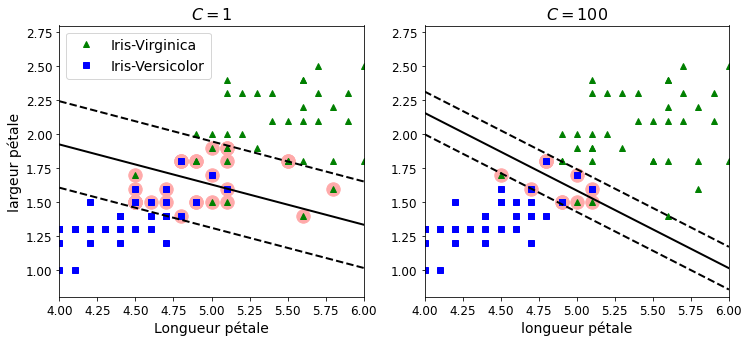

In [14]:
#on trace les deux modèles

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Longueur pétale", fontsize=14)
plt.ylabel("largeur pétale", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("longueur pétale", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])
#save_fig("regularization_plot")
plt.show()

## la méthode shaft pour voir l'importance des caractéristiques

In [16]:
import sklearn
import shap
from sklearn.model_selection import train_test_split
warnings.simplefilter("ignore")

# print the JS visualization code to the notebook
shap.initjs()

X,y = shap.datasets.iris()


svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X, y)

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X, link="logit")
shap_values = explainer.shap_values(X, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X.iloc[0,:], link="logit",out_names='setosa')




Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/150 [00:00<?, ?it/s]

L'explication ci-dessus montre les caractéristiques qui contribuent chacune à faire passer la sortie du modèle de la valeur de base (la sortie moyenne du modèle sur l'ensemble des données de formation que nous avons passées) à la sortie du modèle. Les caractéristiques qui poussent la prédiction vers le haut sont indiquées en rouge, celles qui poussent la prédiction vers le bas sont en bleu.

In [17]:
# plot the SHAP values for the Versicolor output of the hundredth instance
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X.iloc[100,:], link="logit",out_names='versicolor')





In [18]:
# plot the SHAP values for the Virginica output of the first instance
shap.force_plot(explainer.expected_value[2], shap_values[2][0,:], X.iloc[0,:], link="logit",out_names='virginica')





In [19]:
# plot the SHAP values for the Setosa output of all instances
shap.force_plot(explainer.expected_value[0], shap_values[0], X, link="logit",out_names='setosa')

In [20]:
# plot the SHAP values for the versicolor output of all instances
shap.force_plot(explainer.expected_value[0], shap_values[1], X, link="logit",out_names='versicolor')

In [21]:
# plot the SHAP values for the Virginica output of all instances
shap.force_plot(explainer.expected_value[0], shap_values[2], X, link="logit",out_names='virginica')

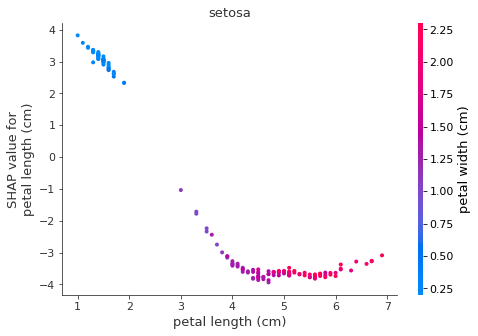

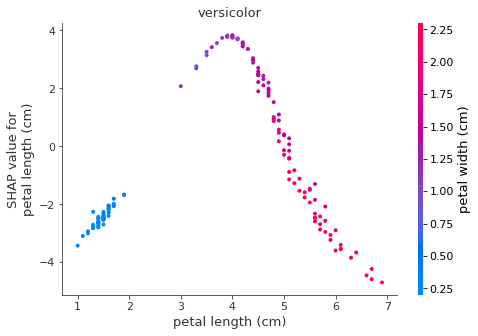

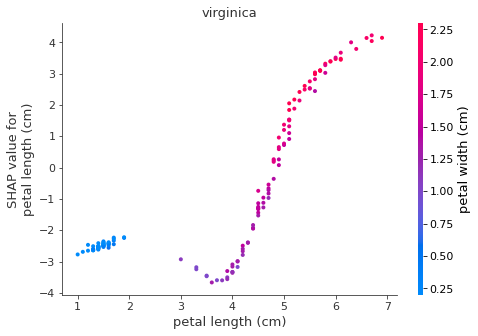

In [22]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("petal length (cm)", shap_values[0], X,title='setosa')
shap.dependence_plot("petal length (cm)", shap_values[1], X,title='versicolor') 
shap.dependence_plot("petal length (cm)", shap_values[2], X,title='virginica') 

Pour obtenir une vue d'ensemble des caractéristiques les plus importantes pour un modèle, nous pouvons tracer les valeurs SHAP de chaque caractéristique pour chaque échantillon. Le graphique ci-dessous trie les caractéristiques par la somme des valeurs SHAP sur tous les échantillons et utilise les valeurs SHAP pour montrer la distribution des impacts de chaque caractéristique sur la sortie du modèle. La couleur représente la valeur de l'élément (rouge haut, bleu bas).

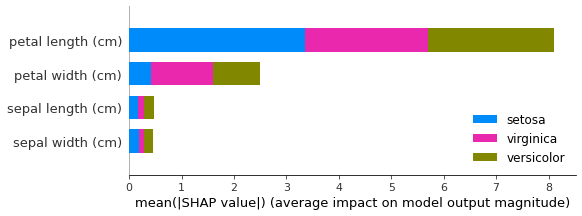

In [23]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X,class_names=['setosa','versicolor','virginica'])

## Classification non linéaire

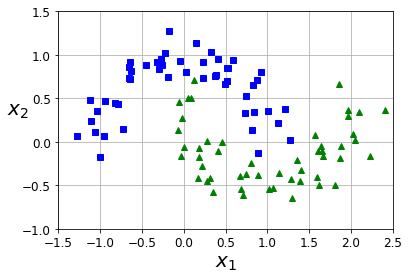

In [24]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [25]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#ici on créé un pipeline avec un noyau polynomial de degré 3, franchement inutile d'aller au dela.
# une standardisation
# un un SVM à marge souple avec C=10

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42,max_iter=10000))
    ])

#et on entraine le modèle
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=10000,
                           random_state=42))])

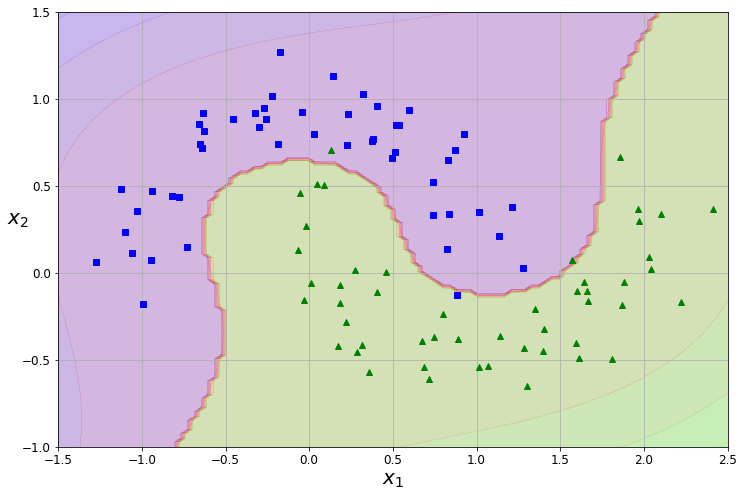

In [26]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.figure(figsize=(12,8))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
#save_fig("moons_polynomial_svc_plot")
plt.show()

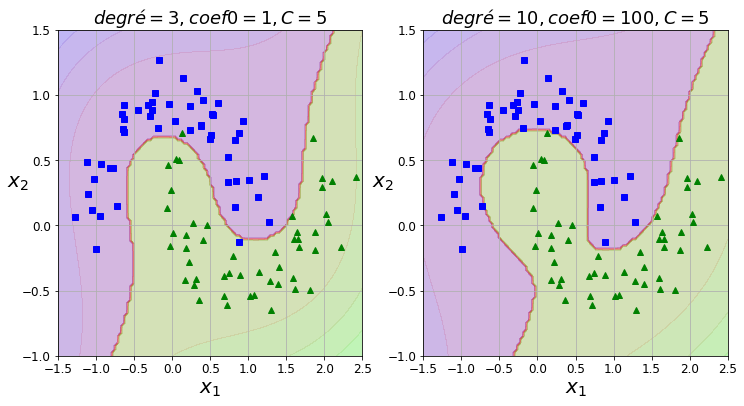

In [27]:
from sklearn.svm import SVC


#degré est le degré du noyau polynomial choisi
#coef0 : Terme indépendant dans la fonction du noyau. Il n'est significatif que dans "poly" et "sigmoïde"
#C largeur de la marge

#un noyau polynomial de degré 3
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)
#un noyau polynomial de degré 10
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(12,6))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$degré=3, coef0=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$degré=10, coef0=100, C=5$", fontsize=18)
#save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()


## RBF : noyau radial gaussien. 
L'astuce consiste à ajouter des variables calculées à l'aide d'une fonction de similarité qui mesure la ressemblance enter chaque observation et un point de repère. Cette fonction est une loi normale.

In [28]:
def gaussian_rbf(x, m, gamma):
    return np.exp(-gamma * np.linalg.norm(x - m, axis=1)**2)

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Saving figure moons_rbf_svc_plot


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jmb/Desktop/INSA 5A INITIATION IA/IMAGES/moons_rbf_svc_plot.png'

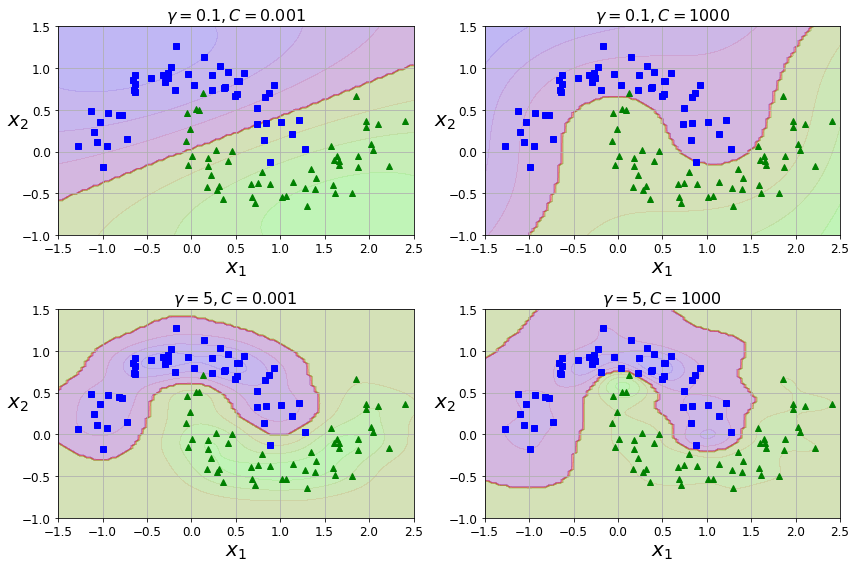

In [29]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(12, 8))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

save_fig("moons_rbf_svc_plot")
plt.show()


## Régression SVM 
### linéaire
Car avec un modèle SVM, on peut aussi faire de la régression

In [ ]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()


from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

In [ ]:

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])


In [ ]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
#save_fig("svm_regression_plot")
plt.show()

### régression non linéaire

In [ ]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()


from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")
plt.show()